In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [82]:
X=df.drop('Cancer Present' , axis=1)
y=df['Cancer Present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scale=StandardScaler()
knn=KNeighborsClassifier()

In [17]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [84]:
operations=[('scale' , scale) , ('knn' , knn)]

In [86]:
pipe=Pipeline(operations)

# Full Cross Validation Grid Search for K Value

In [88]:
k_values=list(range(1,20))
param_grid={'knn__n_neighbors' : k_values}
knn_cv_model=GridSearchCV(pipe , param_grid , cv=10 , scoring='accuracy')

In [90]:
knn_cv_model.fit(X_train , y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [92]:
knn_cv_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=17))],
 'verbose': False,
 'scale': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=17),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 17,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [65]:
pd.DataFrame(knn_cv_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004997,0.001002,0.016193,0.001887,1,{'knn__n_neighbors': 1},0.907407,0.903704,0.885185,0.907407,0.870370,0.903704,0.903704,0.925926,0.933333,0.907407,0.904815,0.016896,19
1,0.004397,0.000490,0.015591,0.000799,2,{'knn__n_neighbors': 2},0.892593,0.929630,0.892593,0.911111,0.892593,0.907407,0.914815,0.918519,0.922222,0.903704,0.908519,0.012511,18
2,0.004298,0.000458,0.015191,0.000399,3,{'knn__n_neighbors': 3},0.929630,0.951852,0.903704,0.929630,0.881481,0.907407,0.922222,0.925926,0.940741,0.929630,0.922222,0.019030,16
3,0.004594,0.000493,0.015595,0.000663,4,{'knn__n_neighbors': 4},0.903704,0.955556,0.907407,0.940741,0.888889,0.907407,0.933333,0.933333,0.929630,0.914815,0.921481,0.019231,17
4,0.004397,0.000490,0.015192,0.000601,5,{'knn__n_neighbors': 5},0.914815,0.962963,0.922222,0.951852,0.888889,0.911111,0.937037,0.937037,0.948148,0.918519,0.929259,0.021111,10
5,0.004596,0.000491,0.015492,0.000501,6,{'knn__n_neighbors': 6},0.922222,0.962963,0.911111,0.940741,0.888889,0.914815,0.925926,0.933333,0.937037,0.929630,0.926667,0.018725,14
6,0.004696,0.000459,0.015294,0.000462,7,{'knn__n_neighbors': 7},0.918519,0.962963,0.925926,0.951852,0.885185,0.914815,0.937037,0.940741,0.948148,0.922222,0.930741,0.021215,6
7,0.004398,0.000489,0.015191,0.000400,8,{'knn__n_neighbors': 8},0.914815,0.970370,0.925926,0.951852,0.896296,0.914815,0.937037,0.944444,0.937037,0.929630,0.932222,0.019948,2
8,0.004497,0.000499,0.015691,0.000640,9,{'knn__n_neighbors': 9},0.914815,0.966667,0.922222,0.951852,0.900000,0.911111,0.929630,0.937037,0.940741,0.914815,0.928889,0.019373,11
9,0.004497,0.000500,0.015592,0.000490,10,{'knn__n_neighbors': 10},0.918519,0.970370,0.918519,0.944444,0.896296,0.907407,0.929630,0.940741,0.937037,0.925926,0.928889,0.019793,12


In [106]:
knn_cv_model.cv_results_['mean_test_score']

array([0.89857143, 0.90285714, 0.91571429, 0.91      , 0.92285714,
       0.91904762, 0.92428571, 0.92428571, 0.92619048, 0.92238095,
       0.92095238, 0.92238095, 0.92142857, 0.92238095, 0.9252381 ,
       0.92714286, 0.92761905, 0.92571429, 0.92619048])

# final model

In [98]:
scale=StandardScaler()
knn17=KNeighborsClassifier(n_neighbors=17)
operation=[('scale' , scale) , ('knn17' , knn17)]
pipe17=Pipeline(operation)
pipe17.fit(X_train , y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn17', KNeighborsClassifier(n_neighbors=17))])

In [100]:
y_pred=pipe17.predict(X_test)

In [78]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , RocCurveDisplay , PrecisionRecallDisplay

In [102]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.94      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



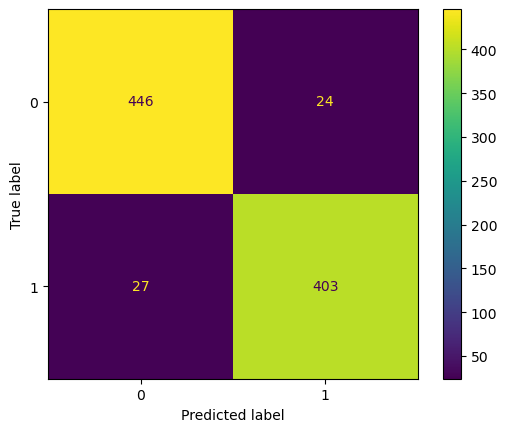

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

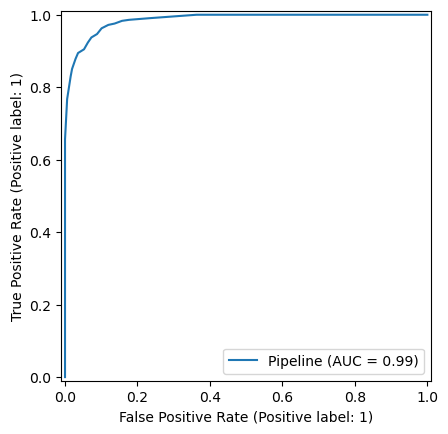

In [110]:
RocCurveDisplay.from_estimator(pipe17 , X_train , y_train)

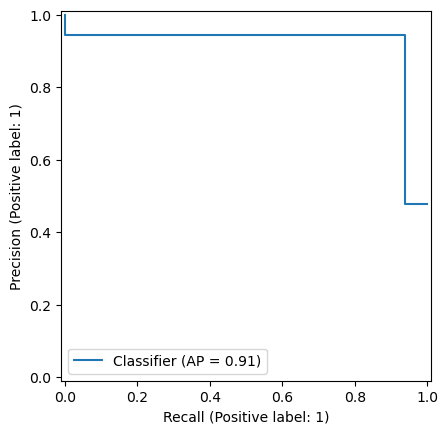

In [112]:
PrecisionRecallDisplay.from_predictions(y_test , y_pred)

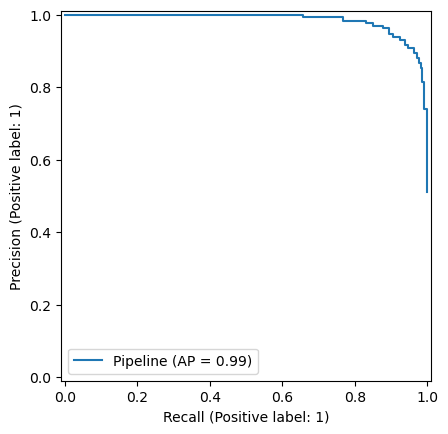

In [114]:
PrecisionRecallDisplay.from_estimator(pipe17 , X_train , y_train)

In [130]:
sampel=X_test.iloc[30]
sampel

Gene One    7.0
Gene Two    3.1
Name: 1005, dtype: float64

In [132]:
pipe17.predict(sampel.values.reshape(1, -1))

C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)